<a href="https://colab.research.google.com/github/SeffySnow/GA-community-detection/blob/main/GA_networkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**a smaller tau1** results in a network with a more pronounced inequality in node degrees, meaning that there are a few nodes with many connections (hubs) and many nodes with few connections.


Similar to tau1, **tau2** controls the distribution of community sizes within the network, also following a power-law distribution. A smaller tau2 indicates that a few communities are much larger than the rest, while a larger tau2 results in more uniform community sizes.

A lower value of **mu** means that most of the edges are within communities, leading to a network with strongly defined communities. Conversely, a higher value of mu results in a network where edges are more evenly distributed across communities, making the community structure less distinct.


## Connecting to the google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


##Creating a folder (if it doesn't exits)

In [ ]:

!mkdir '/content/drive/My Drive/ProjectLab/GAcommunityDetection'


mkdir: cannot create directory ‘/content/drive/My Drive/ProjectLab/GAcommunityDetection’: File exists


## Importing Essentials

In [2]:
#Importing Libraries
import networkx as nx
from networkx.generators.community import LFR_benchmark_graph
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community.quality import modularity
import random
import numpy as np

## Creating Graph using LFR_Benchmark

In [4]:
# Generate LFR benchmark graph
n = 60   # number of nodes
tau1 = 3
tau2 = 1.5
mu = 0.1
G = LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=5, min_community=20, seed=10)
path = '/content/drive/My Drive/ProjectLab/GAcommunityDetection/Initial_Graph.txt'
# Store graph in a file
nx.write_adjlist(G, path)


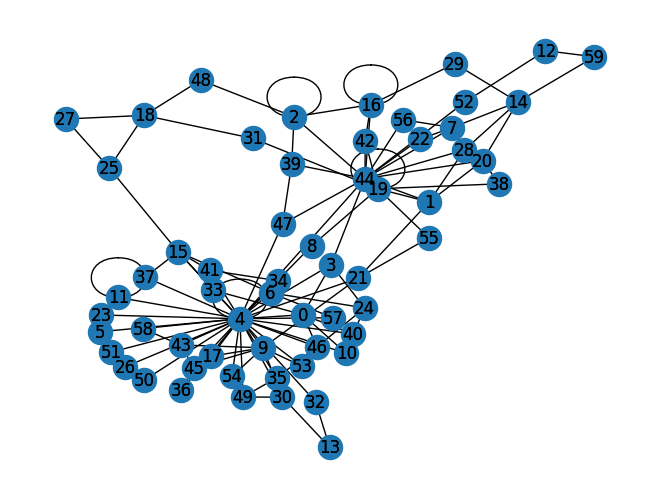

In [5]:
#  visualize the graph G

import matplotlib.pyplot as plt

# Compute the layout for the graph
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True)

# Add labels to the nodes
nx.draw_networkx_labels(G, pos)

# Show the plot
plt.show()


## Number of nodes and edges

In [6]:
# Display number of nodes and edges in the graph
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

Number of nodes: 60
Number of edges: 121


## Defining the first population

In [ ]:
import random
np.random.seed(42)
#Defining population size in each generation
Pop_size = 200
pop_arr = []
#Creating an array including 5 population which each has len(g.nodes) cells
for pop in range(0,Pop_size):
  indiv_array = []
  for id in range(0,len(G.nodes)):
    rand_num =random.randint(1,G.number_of_nodes())
    # print(f'filling individual {id}')
    indiv_array.append(rand_num)
  pop_arr.append(indiv_array)
pop_arr = np.array(pop_arr)
print(pop_arr)

[[138 175  30 ...  26 183 196]
 [184 148 189 ...  48  76  52]
 [211 127 220 ...  12 217  79]
 ...
 [128  42 235 ...  44 222 214]
 [142  83 240 ...  41  56 172]
 [146 102  64 ... 195 188 174]]


## Dercoding the population

In [ ]:
#decoding the assigned clusters
list_of_solution = []
from collections import defaultdict
for individual in range(0,Pop_size):
  cluster_assignments = pop_arr[individual]
  clusters = defaultdict(list)
# Iterate over each node and their cluster assignment
  for node, cluster_id in enumerate(cluster_assignments):
    clusters[cluster_id].append((node))
  solution = (dict(clusters))
  list_of_solution.append(solution)

print(list_of_solution[0])

{138: [0, 204], 175: [1, 20], 30: [2, 60, 61], 114: [3, 87], 75: [4, 100], 19: [5], 243: [6, 180, 232], 23: [7, 39, 179], 172: [8, 221], 147: [9, 24], 86: [10], 247: [11], 156: [12, 149], 192: [13], 167: [14, 56, 107, 208], 159: [15], 11: [16], 132: [17, 42], 111: [18, 120, 210], 187: [19, 125], 143: [21, 199], 3: [22], 122: [23], 48: [25], 241: [26, 128], 84: [27], 213: [28], 208: [29], 221: [30, 212], 65: [31, 65, 140, 227], 179: [32], 25: [33], 62: [34], 168: [35, 226], 214: [36], 181: [37, 145], 232: [38], 176: [40, 93], 242: [41, 182], 100: [43], 212: [44], 109: [45, 48, 141], 173: [46], 28: [47, 68], 43: [49], 210: [50, 202], 98: [51], 240: [52, 156], 154: [53], 215: [54, 238], 164: [55, 228], 57: [57, 211], 123: [58, 108, 175], 5: [59, 215], 149: [62, 163, 191], 182: [63, 102, 200], 148: [64], 4: [66, 233], 81: [67], 67: [69, 213], 2: [70, 237], 226: [71], 142: [72], 180: [73, 96], 207: [74, 130], 163: [75], 36: [76], 95: [77], 15: [78], 29: [79, 103], 45: [80], 44: [81, 84, 97,

## Checking modularity score

In [ ]:
## A dictionary of modularity scores to know which modularioty is for which solution
modularity_scores_dict = {}

# Open a text file to write the population and their modularity values
with open('modularity_scores.txt', 'w') as file:
    for i, individual in enumerate(list_of_solution, start=1):
        modularity_score = nx.algorithms.community.modularity(G, list(individual.values()))
        # Add modularity score to the dictionary with solution ID as key
        modularity_scores_dict[i] = modularity_score
        # Write to file
        file.write(f'Solution {i}: Modularity = {modularity_score}\n')

# print(modularity_scores_dict)

## Sort the dictionary by values (modularity scores) in descending order and select top 10
sorted_modularity_scores = sorted(modularity_scores_dict.items(), key=lambda item: item[1], reverse=True)[:10]
# print(sorted_modularity_scores)


# Initialize potential_parents list
potential_parents = []
# # Add the top ten solutions with their modularity scores to the potential_parents list
for solution_id, modularity_score in sorted_modularity_scores:
    # Assuming you want the entire individual's solution (decoded form) added to potential_parents
    potential_parents.append({
        "id": solution_id,
        "modularity": modularity_score,
        "solution": list_of_solution[solution_id-1]  # -1 because enumerate started at 1
    })


for parent in potential_parents:
    print(f'Solution {parent["id"]}: Modularity = {parent["modularity"]}, solution is = {parent["solution"]}')


Solution 119: Modularity = -0.002790089258233308, solution is = {78: [0, 80, 242], 124: [1, 158], 70: [2], 145: [3, 195], 203: [4], 168: [5, 127, 143], 19: [6, 28, 199], 208: [7], 65: [8, 55], 205: [9, 45, 197], 74: [10, 49, 145, 175], 111: [11, 24, 37], 171: [12], 27: [13], 31: [14, 17, 109], 93: [15, 231, 234], 192: [16, 60], 242: [18, 83, 133], 157: [19, 22, 223], 215: [20, 162], 226: [21], 163: [23, 174], 231: [25], 121: [26], 218: [27], 3: [29, 90], 4: [30, 182], 134: [31, 54], 188: [32, 247], 118: [33], 161: [34, 248], 5: [35, 139], 191: [36], 92: [38], 117: [39], 22: [40, 129], 79: [41], 249: [42, 47, 51], 34: [43, 71], 172: [44, 87], 135: [46], 119: [48, 136], 48: [50, 76], 152: [52, 85, 218, 239], 61: [53, 70, 186], 221: [56], 225: [57], 141: [58, 137], 96: [59, 244], 24: [61], 213: [62, 146], 32: [63, 155, 224], 143: [64, 246], 13: [65, 88, 221], 14: [66, 150], 156: [67], 244: [68, 144], 67: [69, 141, 240], 142: [72, 180, 243], 247: [73, 151, 203], 30: [74, 130], 110: [75], 2

## Creating new population:

*  Encoding each best solutions to perfom crossover and mutation on indecies

*  Crossover

*   Mutation

*   Creating new population with the size of population size


In [ ]:
import numpy as np
from random import sample

## encode each besat solutions to the original form of [1,2,2,3,11,....]
def encoding(potential_parents):
  encoded_potential_parents= [0] * 10
  for i,parent in enumerate(potential_parents):
      solution = parent["solution"]
      encoded_parents=[0] * num_nodes
      for community_id, nodes in solution.items():
        for node in nodes:
          encoded_parents[node] = community_id
      # print(encoded_parents)
      encoded_potential_parents[i] = encoded_parents
  return encoded_potential_parents




# def crossover(parent1, parent2, crossover_rate=0.8):
#     """Perform crossover between two parents to produce two new offspring."""
#     # Calculate the number of traits to exchange
#     num_traits_to_exchange = int(len(parent1) * crossover_rate)  #8
#     # Randomly select traits to exchange #[0,3,5,4,6,2,7,9]
#     traits_to_exchange = sample(list(range(len(parent1))), num_traits_to_exchange)
#     # Create offspring by copying parents
#     offspring1 = parent1.copy()
#     offspring2 = parent2.copy()

#     # Exchange the selected traits
#     for trait in traits_to_exchange:
#         offspring1[trait], offspring2[trait] = offspring2[trait], offspring1[trait]

#     return mutate(offspring1), mutate(offspring2)

# # Assuming potential_parents is already filled with encoded parents
# # And assuming the desired new population size is equal to the size of the list_of_solution
# new_population = []



def mutate(individual, mutation_rate=0.2):

    max_community_id = max(individual)

    for i in range(len(individual)):
        if random.random() < mutation_rate:
            # Perform mutation: assign a new random community ID
            # Avoid assigning the same community by ensuring the new ID is different
            new_community_id = individual[i]
            while new_community_id == individual[i]:
                new_community_id = random.randint(1, max_community_id)
            individual[i] = new_community_id

    return individual
potential_parents2 = encoding(potential_parents)


# while len(new_population) < Pop_size:
#     # Select two parents randomly for crossover
#     parent_indices = np.random.choice(range(len(potential_parents2)), 2, replace=False)
#     parent1 = potential_parents2[parent_indices[0]]
#     parent2 = potential_parents2[parent_indices[1]]
#     offspring1, offspring2 = crossover(parent1, parent2, crossover_rate=0.8)
#     new_population.extend([offspring1, offspring2])
# # for individual in new_population:
# #     print(individual )
# # print(len(new_population))

In [13]:
#Defining  initial population which is a nested list of randomly assigned community to nodes (indexes)
import random
from collections import defaultdict
from random import sample

np.random.seed(42)
def initialize_population(pop_size, num_nodes):
    return [[random.randint(1, num_nodes) for _ in range(num_nodes)] for _ in range(pop_size)]

# Decoding each individual such that demonstrates which nodes in which community using dictionay and add it to the list of solutions : [{cluster : [nodes]}]
def decode_population(pop_arr):
    list_of_solution = []
    for individual in pop_arr:
        clusters = defaultdict(list)
        for node, cluster_id in enumerate(individual):
            clusters[cluster_id].append(node)
        list_of_solution.append(dict(clusters))
    return list_of_solution


def encoding(potential_parents):
  encoded_potential_parents= [0] * 10
  for i,parent in enumerate(potential_parents):
      solution = parent["solution"]
      encoded_parents=[0] * num_nodes
      for community_id, nodes in solution.items():
        for node in nodes:
          encoded_parents[node] = community_id
      # print(encoded_parents)
      encoded_potential_parents[i] = encoded_parents
  return encoded_potential_parents

def crossover(parent1,parent2, crossover_rate=0.4):
  """Perform crossover between two parents to produce two new offspring."""
  chance = np.random.random()
  offspring = [0] * num_nodes
  np.random.seed(42)
  for i in range(0,len(offspring)):
    if chance > crossover_rate:
        offspring[i] = parent1[i]
    else:
        offspring[i] = parent2[i]
  return offspring



def mutate(individual, mutation_rate=0.01):
    num_nodes = len(individual)
    # Calculate the exact number of genes to mutate.
    genes_to_mutate = int(num_nodes * mutation_rate)

    # Ensure there's at least one gene to mutate if the percentage calculation results in zero.
    genes_to_mutate = max(1, genes_to_mutate)

    max_community_id = max(individual)

    # Select genes_to_mutate unique indices to mutate.
    indices_to_mutate = random.sample(range(num_nodes), genes_to_mutate)

    for index in indices_to_mutate:
        new_community_id = individual[index]
        # Generate a new community ID different from the current one.
        while new_community_id == individual[index]:
            new_community_id = random.randint(1, len(individual))
        individual[index] = new_community_id

    return individual


def genetic_algorithm(G, pop_size, num_generations):
    num_nodes = len(G.nodes)
    pop_arr = initialize_population(pop_size, num_nodes)
    best_solution = None
    with open('modularity_scores.txt', 'w') as file:
        file.write("Starting new execution of the genetic algorithm.\n")
    elites = []
    for generation in range(num_generations):
      list_of_solution = decode_population(pop_arr)
      modularity_scores_dict = {}

      with open('modularity_scores.txt', 'a') as file:
        file.write(f"\n generation #{generation}: \n")

        # calculating modularity for each  individuals
        for i, individual in enumerate(list_of_solution, start=1):
            modularity_score = nx.algorithms.community.modularity(G, list(individual.values()))

            # Add modularity score to the dictionary with solution ID as key
            modularity_scores_dict[i] = modularity_score

            # Write to file
            file.write(f'Solution {i}: Modularity = {modularity_score}\n')

      # Sort the dictionary by values (modularity scores) in descending order and select top 10
      sorted_modularity_scores = sorted(modularity_scores_dict.items(), key=lambda item: item[1], reverse=True)[:10]

      potential_parents = []

      # Add the top ten solutions with their modularity scores to the potential_parents list
      for solution_id, modularity_score in sorted_modularity_scores:
          potential_parents.append({
              "id": solution_id,
              "modularity": modularity_score,
              "solution": list_of_solution[solution_id-1]  # -1 because enumerate started at 1
          })
      elites.append(dict({"Generation" : generation ,"ID" :potential_parents[0]["id"]  , "modularity":  potential_parents[0]["modularity"],"solution":potential_parents[0]['solution']   }))

      # mentioning the top ten parents in the text file
      with open('modularity_scores.txt', 'a') as file:
        file.write(f'\n 10 Selected parents are:')
        for parent in potential_parents:
            file.write(f' \n Solution {parent["id"]} with  Modularity = {parent["modularity"]} ')

      # Convert potential parents to encoded form for crossover and mutation
      potential_parents2 = encoding(potential_parents)

      # print(len(potential_parents2))
      new_population = []
      # Prepare for the next generation
      pop_arr = new_population[:pop_size]
      while len(new_population) < pop_size:
        chance = np.random.random()
        parent_indices = np.random.choice(range(len(potential_parents2)), 2, replace=False)
        parent1, parent2 = potential_parents2[parent_indices[0]], potential_parents2[parent_indices[1]]
        if chance > 0.5:
          offspring = crossover(parent1, parent2, crossover_rate=0.5)
          new_population.extend([offspring])
        else:
          offspring = mutate(parent1)
          new_population.extend([offspring])

      pop_arr = new_population


    return   max(elites, key=lambda x: x['modularity'])


In [20]:
genetic_sol = genetic_algorithm(G,50,350)

Evaluation :

In [17]:
! pip install networkx scikit-learn

In [23]:
from sklearn.metrics.cluster import normalized_mutual_info_score

# Your solution as provided
solution = genetic_sol["solution"]

ground_truth_communities = list(nx.algorithms.community.greedy_modularity_communities(G))
ground_truth_labels = [0] * len(G.nodes)
solution_labels = [0] * len(G.nodes)

# Assign labels based on the ground truth communities
for label, community in enumerate(ground_truth_communities):
    for node in community:
        ground_truth_labels[node] = label

# Assign labels based on your solution
for label, nodes in solution.items():
    for node in nodes:
        solution_labels[node] = label
# print(solution_labels), print(ground_truth_labels)
print(ground_truth_communities)
# Step 4: Calculate NMI
nmi_score = normalized_mutual_info_score(ground_truth_labels, solution_labels)
print("NMI Score:", nmi_score)

[frozenset({1, 2, 7, 12, 14, 16, 19, 20, 22, 28, 29, 38, 39, 42, 44, 47, 52, 56, 59}), frozenset({33, 34, 4, 37, 5, 6, 8, 41, 11, 15, 50, 51, 23, 57, 26}), frozenset({36, 9, 43, 45, 17, 21, 54, 55, 58}), frozenset({0, 40, 3, 53, 24, 10, 46}), frozenset({48, 18, 25, 27, 31}), frozenset({32, 49, 35, 13, 30})]
NMI Score: 0.5717330396027812
